## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 3: Exploratory Data Analysis - Retail

In this task, as a business manager, we need to find out the weak areas where you can work to make more profit & business problems we can derive by exploring the data using ‘Exploratory Data Analysis’ on dataset ‘SaplteSuperstore’.
### Steps:

* 1 - Importing the dataset
* 2 - Visualizing the dataset
* 3 - Preparing Data
* 4 - Finding Optimum number of Clusters
* 5 - Applying KMeans on data
* 6 - Visualizing the Clusters formed

### 1 - Importing the dataset

In [135]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
store_data = pd.read_csv("T3_data.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
store_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [25]:
store_data.duplicated().sum()

17

> There total 17 duplicate data items, so we remove it for the dataset "store_data"

In [28]:

store_data.drop_duplicates().shape

(9977, 13)

In [20]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

> As per above data we can conclude that "store_data" does not have any null data. That means we can work on the dataset now as there is no ambigious data.

In [32]:
store_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

> Here, we have:
* 3 Contineous type of data
* 1 Discrete type of data
* 1 Ordinal type of data
* Rest 9 columns are Nominal type of data

In [34]:
#store_data.nunique()
store_data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


> From the above data we can analyze unique categories and max, min values for each attribute.

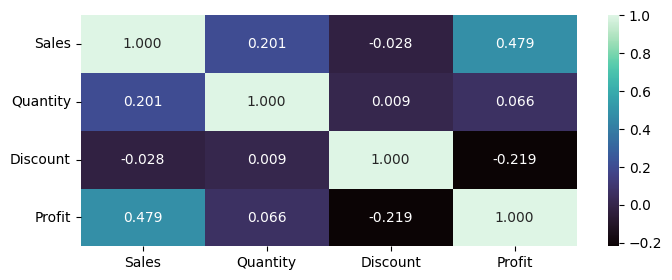

In [56]:
corr_num=store_data.loc[:,['Sales','Quantity','Discount','Profit']]
plt.figure(figsize=(8,3))
sns.heatmap(corr_num.corr(),annot=True, fmt='0.3f', cmap='mako')
plt.show()

> From the above analysis of heatmap we can say...
* Profit and Discount are negatively correlated
* Profit and Sales are positively correlated
* Discount has some what negative correlation with the Sales.

### Listing unique values for each property

In [60]:
for i in store_data.columns:
    print('Total unique count of', i + '  :',store_data[i].nunique())

Total unique count of Ship Mode  : 4
Total unique count of Segment  : 3
Total unique count of Country  : 1
Total unique count of City  : 531
Total unique count of State  : 49
Total unique count of Postal Code  : 631
Total unique count of Region  : 4
Total unique count of Category  : 3
Total unique count of Sub-Category  : 17
Total unique count of Sales  : 5825
Total unique count of Quantity  : 14
Total unique count of Discount  : 12
Total unique count of Profit  : 7287


### Visualization of Outliers in dataset

<Axes: >

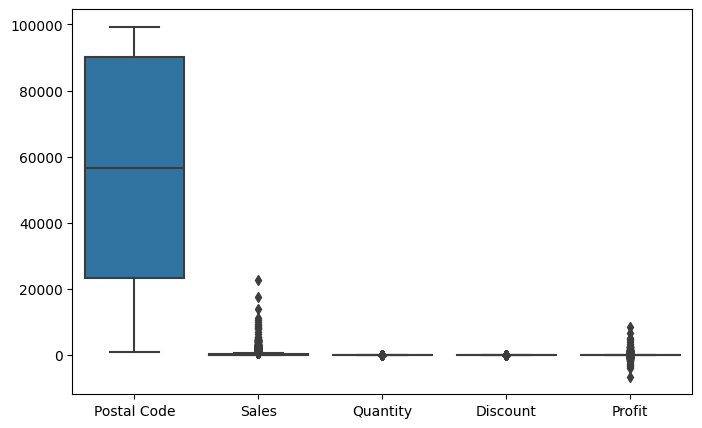

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(data=store_data)

<Axes: xlabel='Category', ylabel='Sales'>

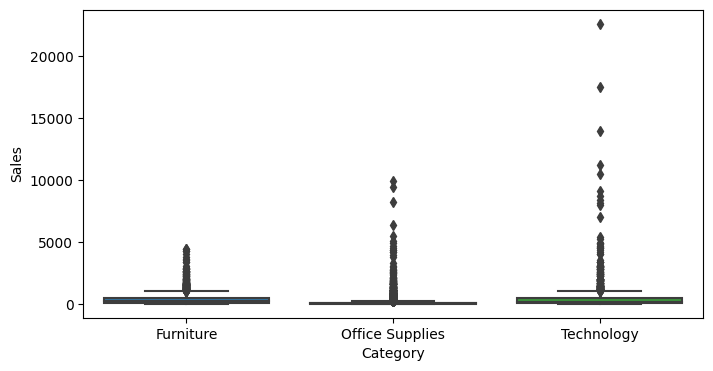

In [102]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Category', y='Sales', data=store_data)

> Form the above boxplot, ignoring postal code, Sales and Profit have most Outliers and are specific to Technology and office Supplies wrt sales.

### Visualization of Store data

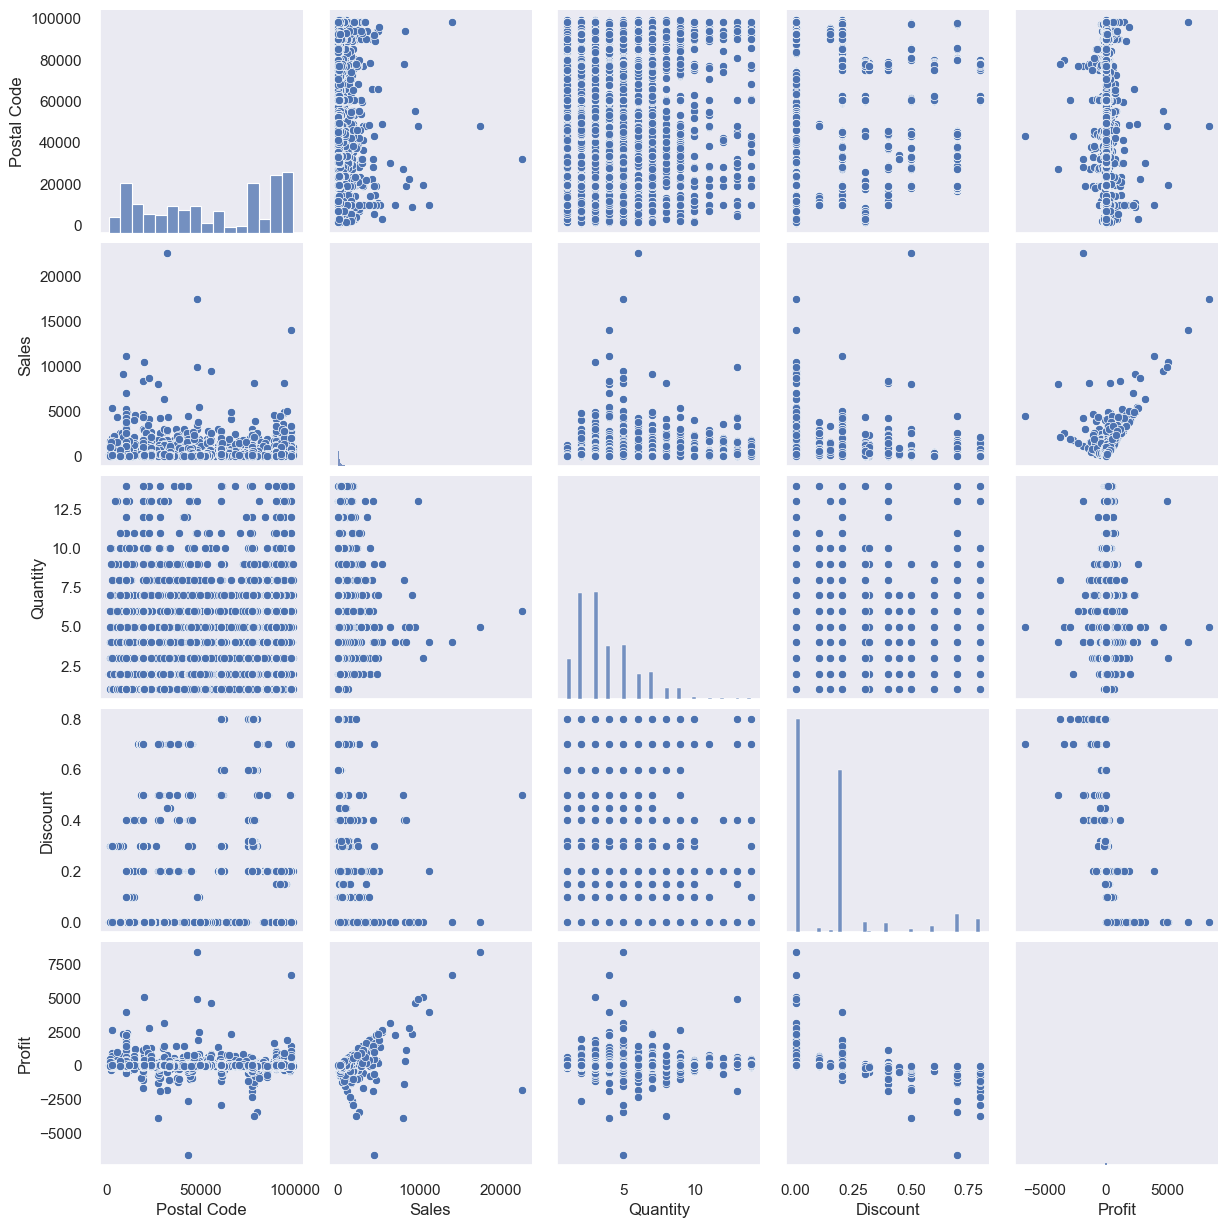

In [174]:
sns.pairplot(store_data)
plt.show()

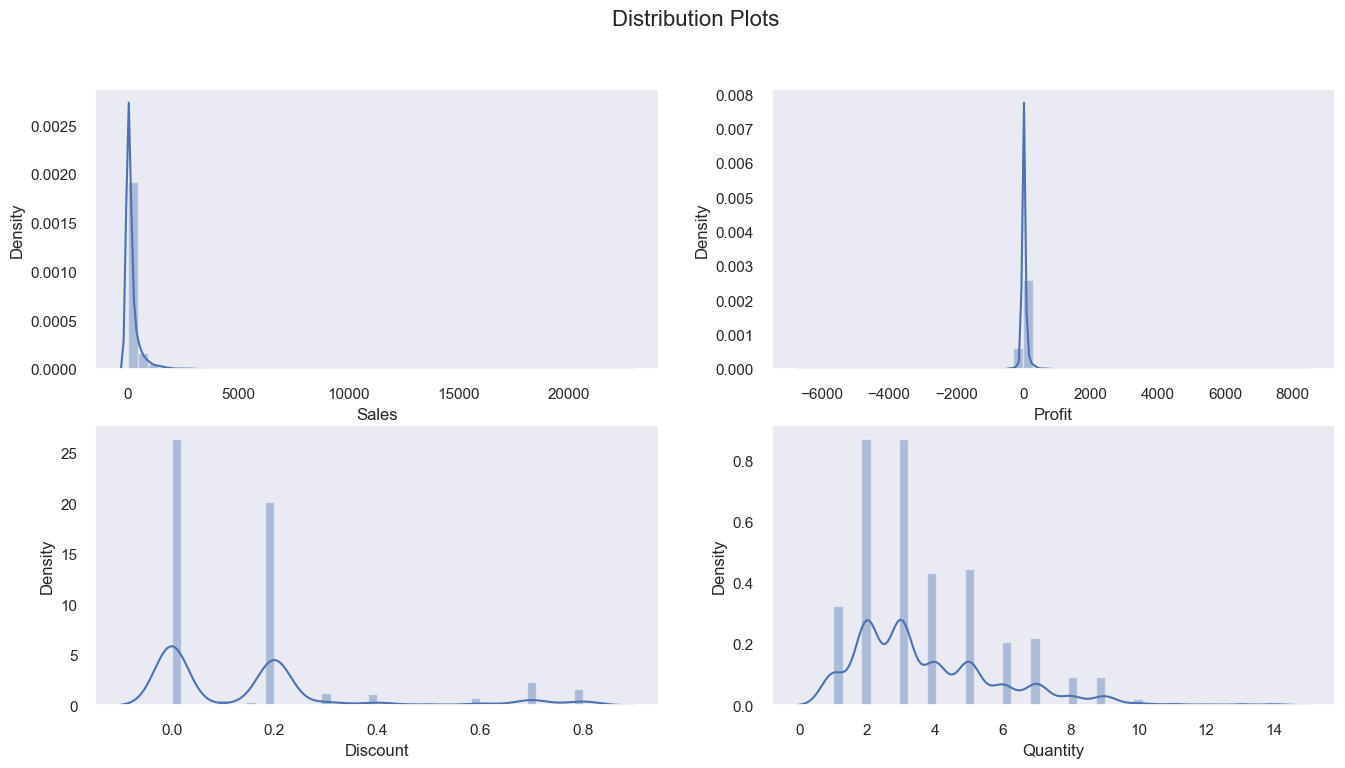

In [176]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution Plots",fontsize=16)
sns.distplot(store_data['Sales'],ax=axes[0,0])
sns.distplot(store_data['Profit'],ax=axes[0,1])
sns.distplot(store_data['Discount'],ax=axes[1,0])
sns.distplot(store_data['Quantity'],ax=axes[1,1])
plt.show()

> From, above displots which represents distribution of Quantitative Attributes:
* Most sales are in around range [0-623]
* Profit range is [-206 - 234]
* Most Discount lies between [0-0.2]
* Most Quantity Count lies between [0-6]

### Exploratory Data Analysis

Here, we will visualize & Explore all the unique features of each column and compare them to find the dependencies between them.

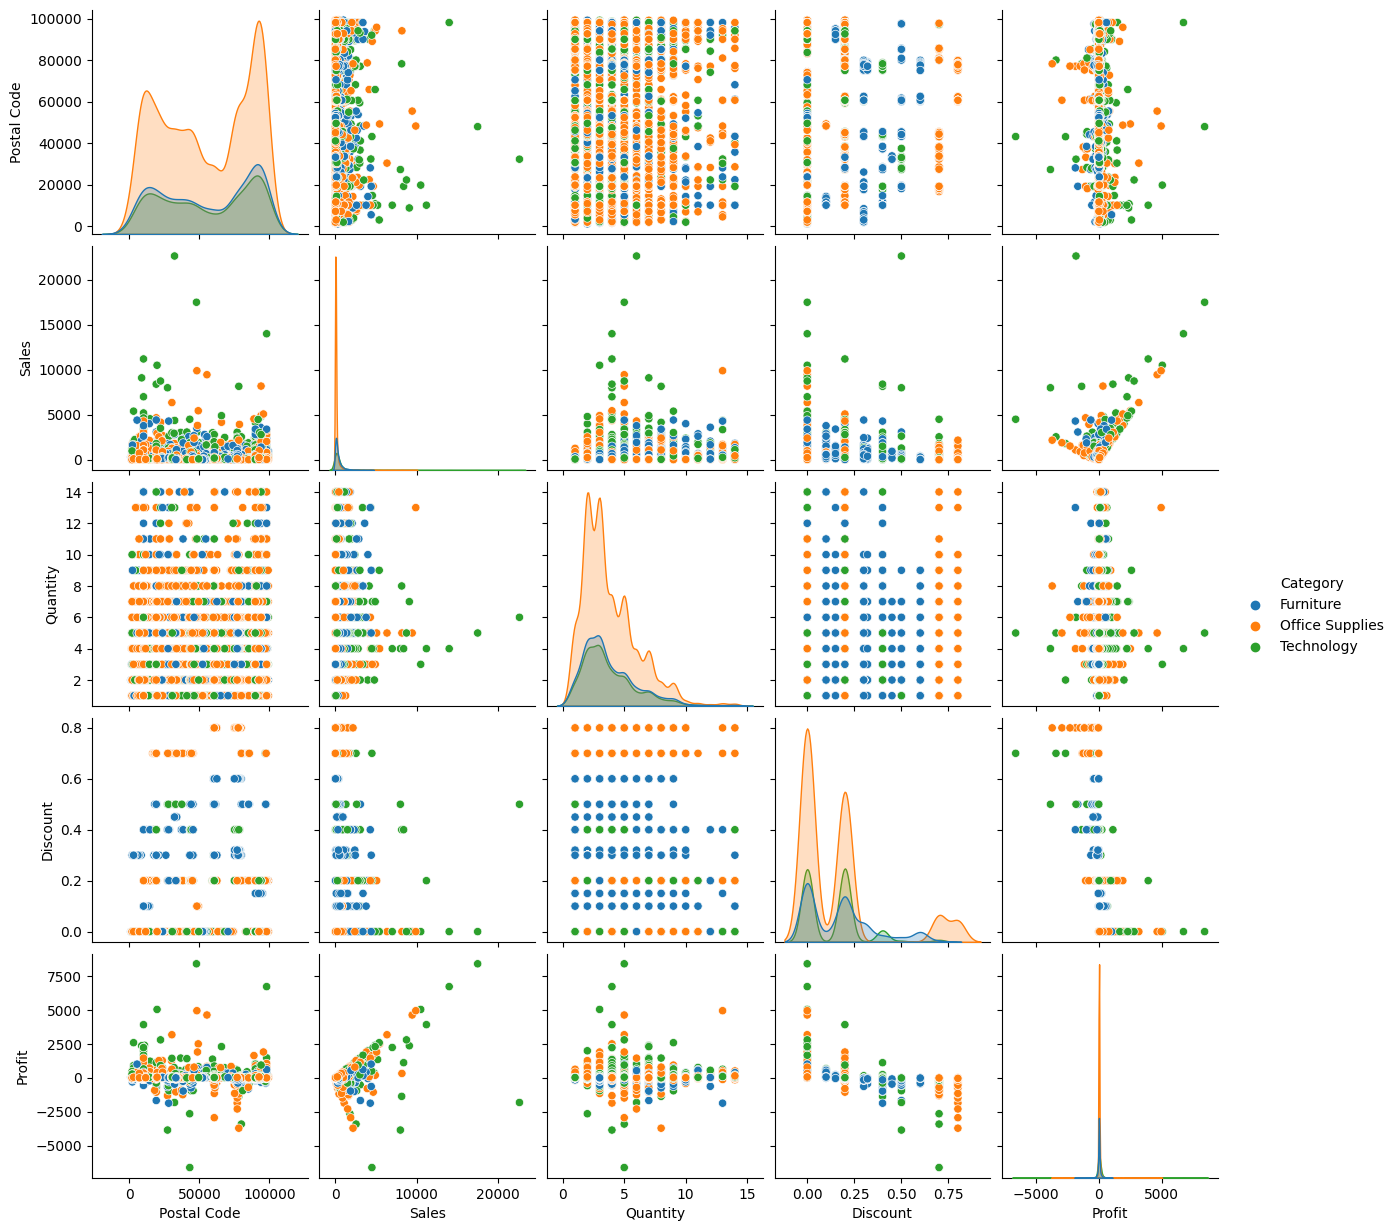

In [105]:
sns.pairplot(data=store_data,hue='Category')
plt.show()

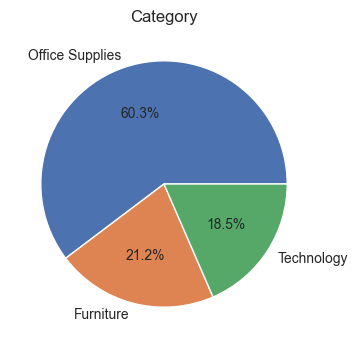

In [169]:
#Visualising the categories 
plt.figure(figsize = (4,4))
textprops = {"fontsize":10}
plt.title('Category')
plt.pie(store_data['Category'].value_counts(), labels=store_data['Category'].value_counts().index,autopct='%1.1f%%', textprops=textprops)
plt.show()

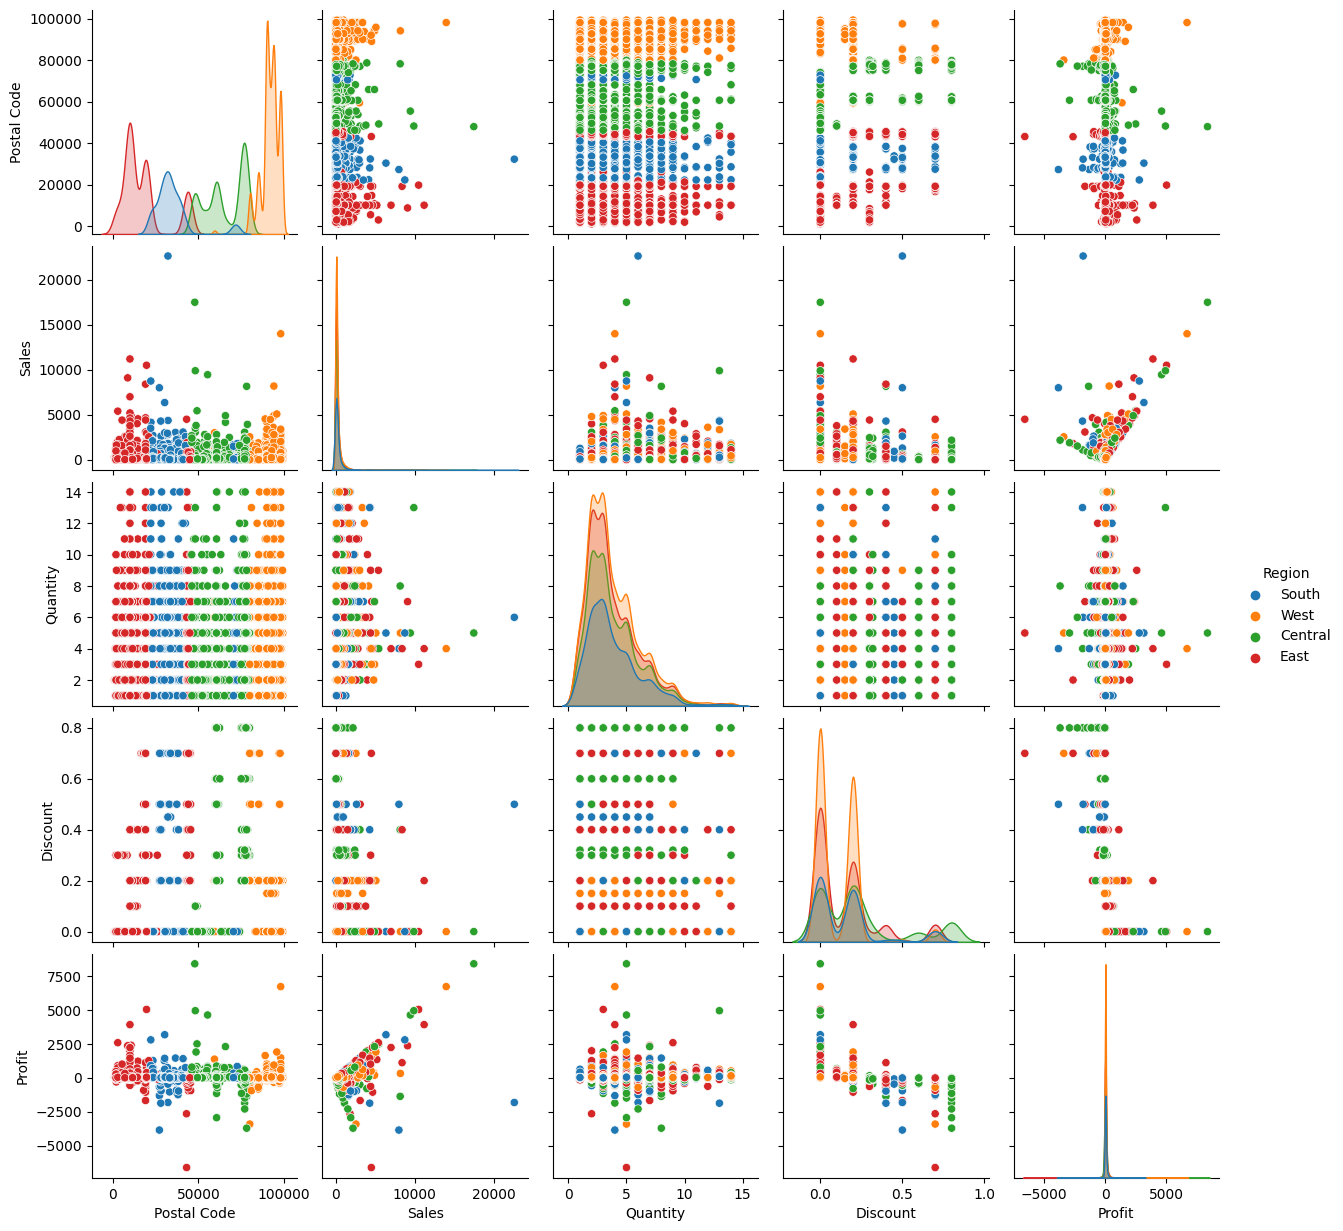

In [119]:
sns.pairplot(data=store_data,hue='Region')
plt.show()

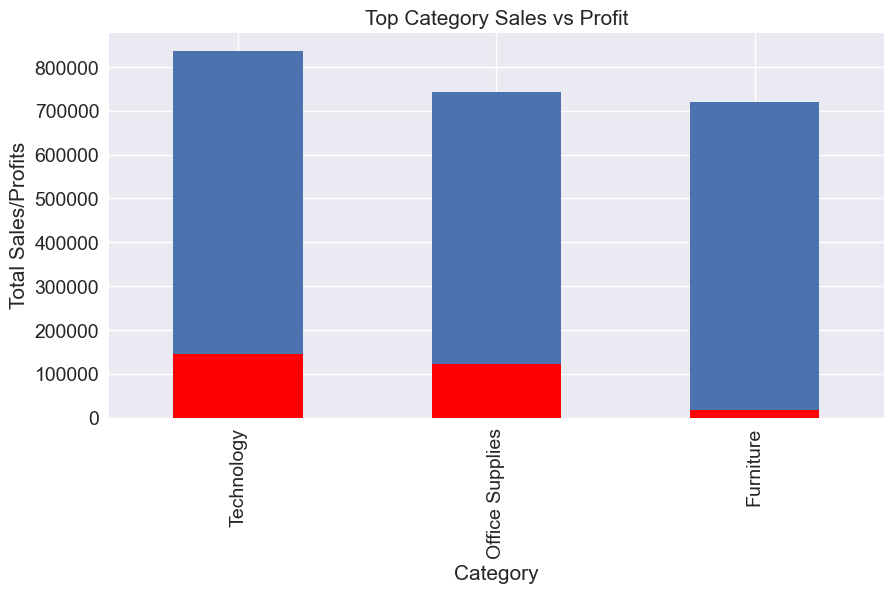

In [132]:
# computing top categories in terms of sales from first 100 observations
top_category_s = store_data.groupby("Category").Sales.sum().nlargest(n=100)
# computing top categories in terms of profit from first 100 observations
top_category_p = store_data.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

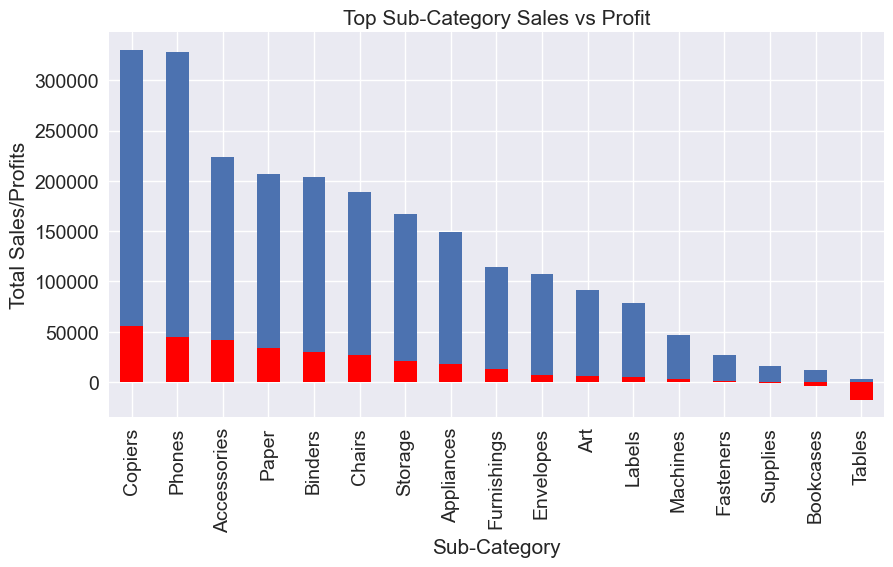

In [136]:
#Visualising the sub categories 

# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = store_data.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = store_data.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

<Axes: ylabel='Sub-Category'>

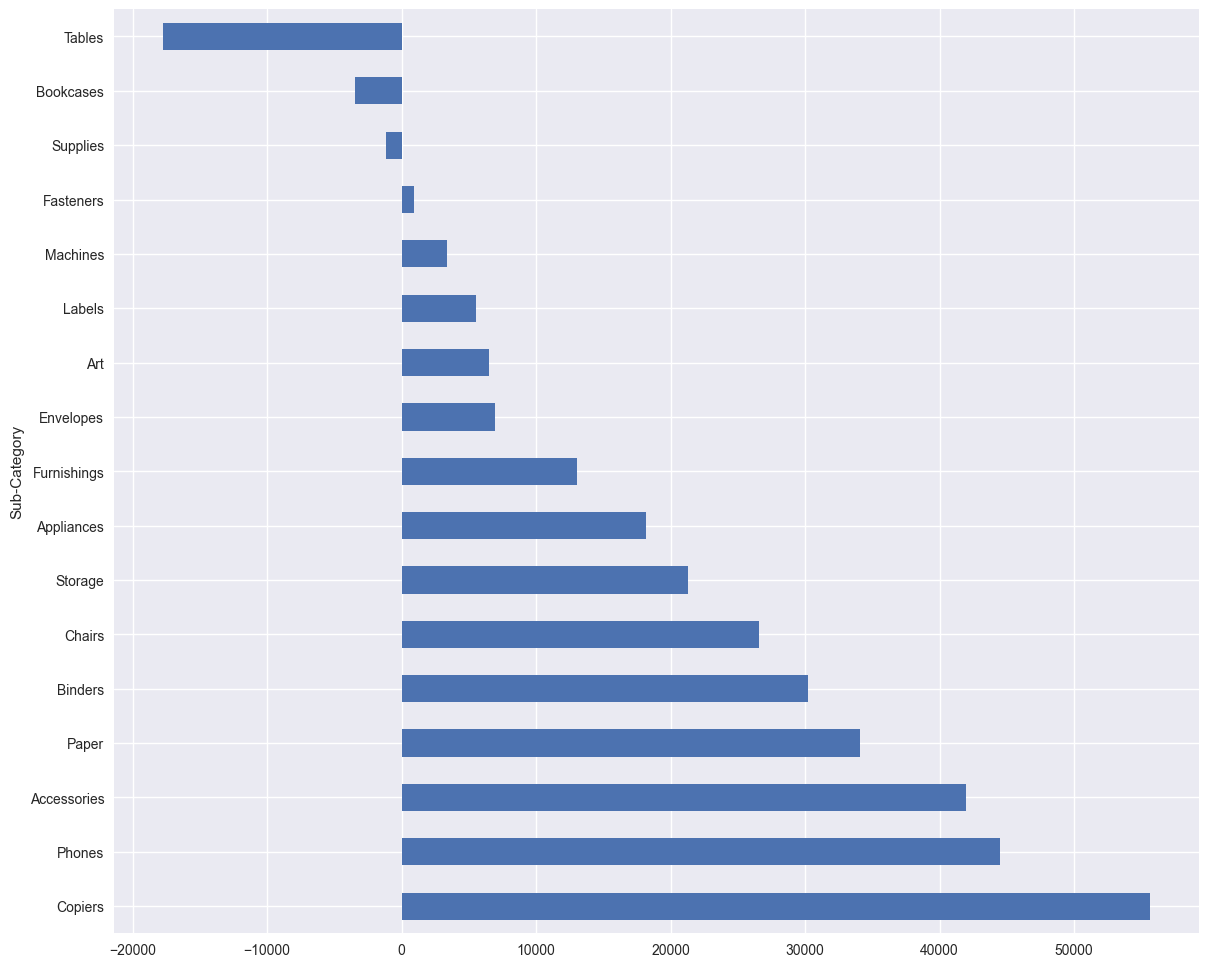

In [151]:
plt.figure(figsize=(14,12))
statewise = store_data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal
#The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

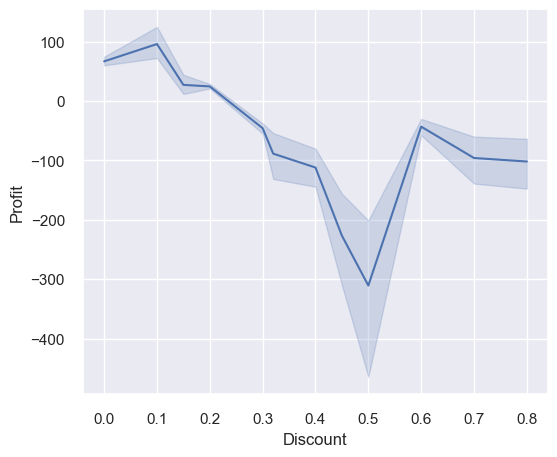

In [164]:
#Visualizing the discount
plt.figure(figsize=(6,5))
sns.lineplot(x=store_data['Discount'], y=store_data['Profit'], data=store_data)
plt.grid()

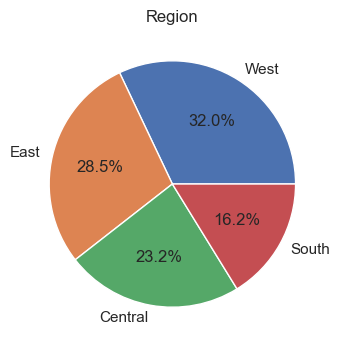

In [165]:
#Visualizing the Sales vs Profits in different Regions
plt.figure(figsize = (4,4))
plt.title('Region')
plt.pie(store_data['Region'].value_counts(), labels=store_data['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()
#The graph shows that West and East have same Profit though sales in the East are less as compared to West.

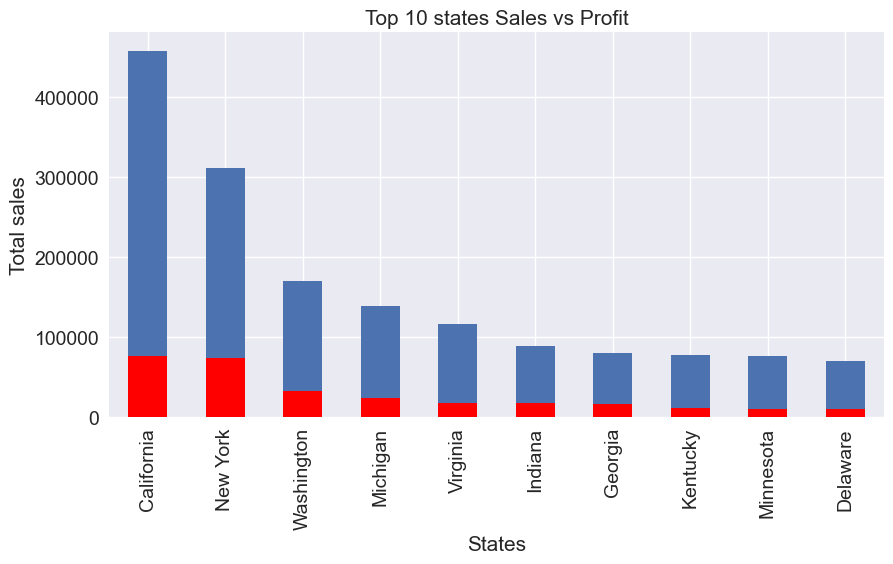

In [141]:
#Visualising the Sales vs Profits in different states
# computing top states in terms of sales from first 10 observations
top_states_s = store_data.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = store_data.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()


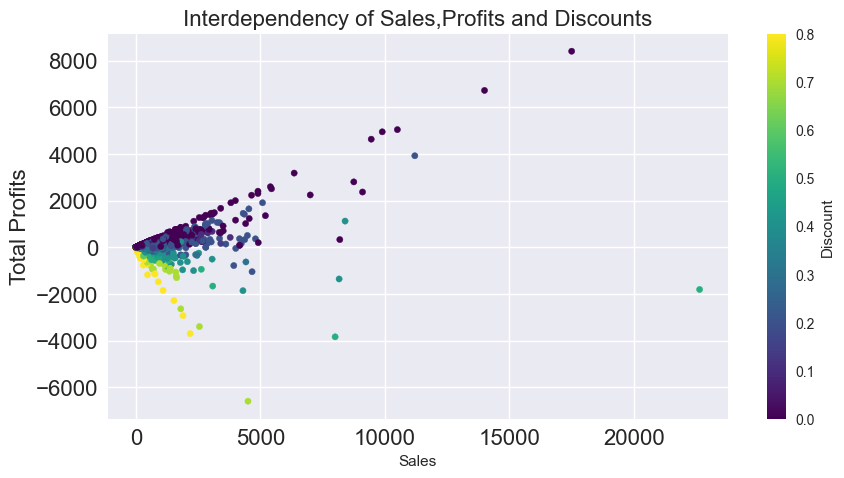

In [145]:
#Checking the interdependency of Sales,Profits and Discounts
plt.style.use('seaborn')
store_data.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()
#The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

### Conclusion:


### Suggestions:
* We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
* Considering the sub-categories sales of tables should be minimized.
* Increase sales more in the east as profit is more.
* We should concentrate on the states like 'New York' and 'California' to make more profits.

## Thank you!